In [15]:
import pandas as pd
import wandb
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.pyplot import MultipleLocator
api = wandb.Api(timeout=19)
mpl.rcParams["axes.unicode_minus"] = False

### export run name

In [4]:
project = "hlsong/drone_flock"
# runs = api.runs(project , {"$and": [{"config.algorithm_name": 'mat'},]})
runs = api.runs(project, {"$and": [{"config.algorithm_name": 'mat'}, ]}, order="-created_at")
runsss = [i for i in runs]
run_list = []
config_list = []
name_list = []
state_list = []
for run in runs:
    config = {k: v for k, v in run.config.items() if not k.startswith('_')}
    config_list.append(config)
    run_list.append('/'.join(run.path))
    name_list.append(run.name)
    state_list.append(run.state)

config_df = pd.DataFrame.from_records(config_list)
name_df = pd.DataFrame({'name': name_list})
run_df = pd.DataFrame({'run': run_list})
state_df = pd.DataFrame({'state': state_list})
all_df = pd.concat([name_df, run_df, state_df, config_df, ], axis=1)
project_config = Path.cwd() / 'data' / f"{project.split('/')[-1]}_configs.csv"
project_config.parent.mkdir(parents=True, exist_ok=True)
all_df.to_csv(project_config)

### run_name_list

In [5]:
DroneEnv = {
    "Flock-4xagent": {
        # "MAJOR": [
        #     "fmxfranky/iclr22-drone-experiments/runs/1zgungx5",
        #     "fmxfranky/iclr22-drone-experiments/runs/2lvz9avu",
        #     "fmxfranky/iclr22-drone-experiments/runs/2hpj5s5o",
        #     "fmxfranky/iclr22-drone-experiments/runs/2jt2dh29",
        #     "fmxfranky/iclr22-drone-experiments/runs/3ln8i0k7",
        # ],
        "MAT": [
            "hlsong/drone_flock/6f515t5e",
            "hlsong/drone_flock/49dki36q",
            "hlsong/drone_flock/tbabd3ph",
            "hlsong/drone_flock/zqt3wabq",
            "hlsong/drone_flock/9pz6r54v",
            "hlsong/drone_flock/lhwte7je",
        ],
        "MASK_AGENT": [
            "hlsong/drone_flock/34l4scr8",
            "hlsong/drone_flock/7m83f190",
            "hlsong/drone_flock/ssm6oaoy",
            "hlsong/drone_flock/2yebjpm7",
        ],
        "MASK_AGENT_pro": [
            "hlsong/drone_flock/0sozqzjq",
            "hlsong/drone_flock/uhflgrpf",
            "hlsong/drone_flock/shit0ewx",
            "hlsong/drone_flock/h7ivvza2",
            "hlsong/drone_flock/4j1wcvho",
        ],
        # "HAPPO": [
        #     "fmxfranky/iclr22-drone-experiments/runs/26uq48wn",
        #     "fmxfranky/iclr22-drone-experiments/runs/2wzkf1b6",
        #     "fmxfranky/iclr22-drone-experiments/runs/3bdl5c6r",
        #     "fmxfranky/iclr22-drone-experiments/runs/3n7ighr7",
        #     "fmxfranky/iclr22-drone-experiments/runs/2w7h5m4m",
        # ],
        # "MAPPO": [
        #     "fmxfranky/iclr22-drone-experiments/runs/3jehsypw",
        #     "fmxfranky/iclr22-drone-experiments/runs/1hjupjzo",
        #     "fmxfranky/iclr22-drone-experiments/runs/av98mdws",
        #     "fmxfranky/iclr22-drone-experiments/runs/10haayxs",
        #     "fmxfranky/iclr22-drone-experiments/runs/2sfaww43",
        # ],
    },
    "LeaderFollower-4xagent": {
        "MAT": [
            "hlsong/drone_flock/6f515t5e",
            "hlsong/drone_flock/49dki36q",
            "hlsong/drone_flock/tbabd3ph",
            "hlsong/drone_flock/zqt3wabq",
            "hlsong/drone_flock/9pz6r54v",
            "hlsong/drone_flock/lhwte7je",
        ],
        "MASK_AGENT": [
            "hlsong/drone_flock/34l4scr8",
            "hlsong/drone_flock/7m83f190",
            "hlsong/drone_flock/ssm6oaoy",
            "hlsong/drone_flock/2yebjpm7",
        ],
        "MASK_AGENT_pro": [
            "hlsong/drone_flock/0sozqzjq",
            "hlsong/drone_flock/uhflgrpf",
            "hlsong/drone_flock/shit0ewx",
            "hlsong/drone_flock/h7ivvza2",
            "hlsong/drone_flock/4j1wcvho",
        ],
    },
    "Meetup-4xagent": {
        "MAT": [
            "hlsong/drone_flock/6f515t5e",
            "hlsong/drone_flock/49dki36q",
            "hlsong/drone_flock/tbabd3ph",
            "hlsong/drone_flock/zqt3wabq",
            "hlsong/drone_flock/9pz6r54v",
            "hlsong/drone_flock/lhwte7je",
        ],
        "MASK_AGENT": [
            "hlsong/drone_flock/34l4scr8",
            "hlsong/drone_flock/7m83f190",
            "hlsong/drone_flock/ssm6oaoy",
            "hlsong/drone_flock/2yebjpm7",
        ],
        "MASK_AGENT_pro": [
            "hlsong/drone_flock/0sozqzjq",
            "hlsong/drone_flock/uhflgrpf",
            "hlsong/drone_flock/shit0ewx",
            "hlsong/drone_flock/h7ivvza2",
            "hlsong/drone_flock/4j1wcvho",
        ],
    },
}
env_list={"drone":DroneEnv}

### funtion

In [6]:
def get_df_from_wandb( env, scenario, store=True ,save_path='./', smooth=1,smooth_method =2,step_lenth=None):
    df_list = []
    # print(f" - scenario:{scenario}")
    for algo in env[scenario].keys():
        # print(f"  -- algo:{algo}")
        curve_list = []
        for run_name in env[scenario][algo]:
            run = api.run(run_name)
            config = {k: v for k, v in run.config.items() if not k.startswith("_")}
            # print(f"   --- {run.name}")
            if config["env_name"] == "mujoco":
                metric_key = (
                    "eval_average_episode_rewards"
                    if algo == "HAPPO"
                    else "faulty_node_-1/eval_average_episode_rewards"
                )
            elif config["env_name"] == "drone":
                metric_key = "eval_average_episode_rewards"
            elif config["env_name"] == "football":
                metric_key = "eval_average_episode_scores"
            else:
                metric_key = "eval_win_rate"
            history = run.history().dropna()[["_step", metric_key]]
            history["algorithm"] = algo
            history["seed"] = config["seed"]
            history["Environment steps"] = history["_step"]
            history["Reward"] = history[metric_key]
            indicator = "Reward"
            curve_list.append(history)
            # store the data
            if store ==True:
                save_path = Path(save_path) if Path(save_path).is_absolute() else Path.cwd() / save_path
                env_name = run.config['env_name']
                if env_name is not None :
                    if env_name == 'drone':
                        dir_name = save_path / env_name / scenario / algo
                    elif env_name == 'mujoco':
                        map_name = f"{map_name}-{run.config['agent_conf']}"
                        dir_name = save_path / env_name / scenario / algo
                Path.mkdir(dir_name, parents=True, exist_ok=True)
                file_name = dir_name / f"{run.name}.csv"
                history.to_csv(file_name)

            # smooth the data
            if smooth_method == 1 and smooth > 1:
                history["Smooth_Reward"] = history[metric_key].rolling(smooth, min_periods=1).mean()
                indicator = "Smooth_Reward"
            elif smooth_method == 2 and smooth > 1:
                y = np.ones(smooth)
                x = np.asarray(history["Reward"])  # (200, 1)
                x = np.squeeze(x)  # (200,)
                z = np.ones(len(x))
                smoothed_x = np.convolve(x, y, 'same') / np.convolve(z, y, 'same')
                history["Smooth_Reward"] = smoothed_x
                history["Smooth_Reward2"] = history["Reward"].rolling(smooth, min_periods=1).mean()
                indicator = "Smooth_Reward"
        data = pd.concat(curve_list)
        data.reset_index(drop=True, inplace=True)
        df_list.append(data)
    df = pd.concat(df_list)
    df.reset_index(drop=True, inplace=True)
    if step_lenth is not None:
        df = df[df["_step"] < step_lenth]
    return df , indicator

In [7]:
def get_df_from_local(env_name, scenario, data_path, smooth=1, smooth_method=2, step_lenth=None,):
    if Path(data_path).is_absolute():
        data_path = Path(data_path)
    else:
        data_path = Path.cwd() / data_path
    logdir = data_path / env_name / scenario
    df_list = []
    # print(f" - scenario:{scenario}")
    for data_dir in logdir.iterdir():
        if data_dir.is_dir():
            algo = data_dir.parts[-1]
            # print(f"  -- algo:{algo}")
            curve_list = []
            for file in data_dir.rglob('*.csv'):
                # print(f"   --- {file}")
                data = pd.read_csv(file)
                # smooth the data
                if smooth_method == 1 and smooth > 1:
                    data["Smooth_Reward"] = data["Reward"].rolling(smooth, min_periods=1).mean()
                    indicator = "Smooth_Reward"
                elif smooth_method == 2 and smooth > 1:
                    y = np.ones(smooth)
                    x = np.asarray(data["Reward"])  # (200, 1)
                    x = np.squeeze(x)  # (200,)
                    z = np.ones(len(x))
                    smoothed_x = np.convolve(x, y, 'same') / np.convolve(z, y, 'same')
                    data["Smooth_Reward"] = smoothed_x
                    indicator = "Smooth_Reward"
                curve_list.append(data)
            data = pd.concat(curve_list)
            data.reset_index(drop=True, inplace=True)
            df_list.append(data)
        df = pd.concat(df_list)
        df.reset_index(drop=True, inplace=True)
        if step_lenth is not None:
            df = df[df["_step"] < step_lenth]
    return df, indicator


In [8]:
def plot_one_scenario(df, indicator, env_name, scenario, save=False , save_path='./plot_result'):
    sns.set_theme(
        style="darkgrid",
        font_scale=2,
        rc={"lines.linewidth": 3},
        # font="Tlwg Mono",
        color_codes=True,
    )
    colors = [
        sns.color_palette("husl", 9)[0],
        sns.color_palette("husl", 9)[6],
        sns.color_palette("husl", 9)[7],
        # sns.color_palette("husl", 9)[5],
    ]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
    ax.set_title(scenario, fontsize=25)
    sns.lineplot(
        data=df, x="Environment steps", y=indicator, hue="algorithm", palette=colors ,ax=ax
    )
    ax.set_xlabel("Environment steps", labelpad=10)
    ax.set_ylabel("Reward", labelpad=10)
    # ax.xaxis.set_major_locator(MultipleLocator(250000))
    # plt.xlabel("Environment steps", fontsize=30)
    # plt.ylabel("Reward", fontsize=30)
    ax.legend(fontsize=20,loc='best')
    # plt.legend(fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    if save == True:
        path=Path(save_path) / env_name / scenario if Path(save_path).is_absolute() else Path.cwd() / save_path / env_name / scenario
        path.mkdir(parents=True, exist_ok=True)
        file_name = path / f"{env_name}-{scenario}.pdf"
        plt.savefig(file_name)
    # plt.show()

In [9]:
def plot_multi_scenario(env_name, scenarioes, nsize, save=False, save_path='./plot_result', dfargs=None):
    assert nsize[0] * nsize[1] == len(scenarioes)
    sns.set_theme(
        style="darkgrid",
        font_scale=2,
        rc={"lines.linewidth": 3},
        # font="Tlwg Mono",
        color_codes=True,
    )
    colors = [
        sns.color_palette("husl", 9)[0],
        sns.color_palette("husl", 9)[6],
        sns.color_palette("husl", 9)[7],
        # sns.color_palette("husl", 9)[5],
    ]
    fig, axis = plt.subplots(nrows=nsize[0], ncols=nsize[1], figsize=(14*nsize[1], 10*nsize[0]*1.1))

    for i in range(len(scenarioes)):
        scenario = scenarioes[i]
        if dfargs["from_wandb"]:
            df, indicator = get_df_from_wandb(dfargs["env"], scenario, dfargs["store"], dfargs["save_path"], dfargs["smooth"], dfargs["smooth_method"], dfargs["step_lenth"])
        else:
            df, indicator = get_df_from_local(env_name, scenario, dfargs["save_path"], dfargs["smooth"], dfargs["smooth_method"], dfargs["step_lenth"])

        if len(axis.shape)>1:
            ax = axis[i // nsize[1], i % nsize[1]]
        else:
            ax = axis[i]
        ax.set_title(scenario, fontsize=25)
        sns.lineplot(
            data=df, x="Environment steps", y=indicator, hue="algorithm", palette=colors, ax=ax
        )
        ax.set_xlabel('')
        ax.set_ylabel('')
        # ax.xaxis.set_major_locator(MultipleLocator(250000))
        ax.legend(fontsize=20, loc='best')
    # set labels
    if len(axis.shape) > 1:
        for ax in axis[-1, :]:
            ax.set_xlabel('Environment steps', labelpad=10)
        for ax in axis[:, 0]:
            ax.set_ylabel('Reward', labelpad=10)
    else:
        for ax in axis:
            ax.set_xlabel('Environment steps', labelpad=10)
        axis[0].set_ylabel('Reward', labelpad=10)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    if save == True:
        path=Path(save_path) / env_name  if Path(save_path).is_absolute() else Path.cwd() / save_path / env_name
        path.mkdir(parents=True, exist_ok=True)
        file_name = path / f"{env_name}.pdf"
        plt.savefig(file_name)
    # plt.show()

### define

In [10]:
store = True
save_path = './data'
step_lenth = None
smooth = 3
smooth_method = 2
from_wandb = True
save_plot = False
plot_path = './plot_result'

### plot one MAP in one ENV to one IMAGE

In [11]:
env_name = 'drone'
env = env_list[env_name]
scenarios = [key for key in env.keys()]
print(scenarios)

['Flock-4xagent', 'LeaderFollower-4xagent', 'Meetup-4xagent']


env: drone


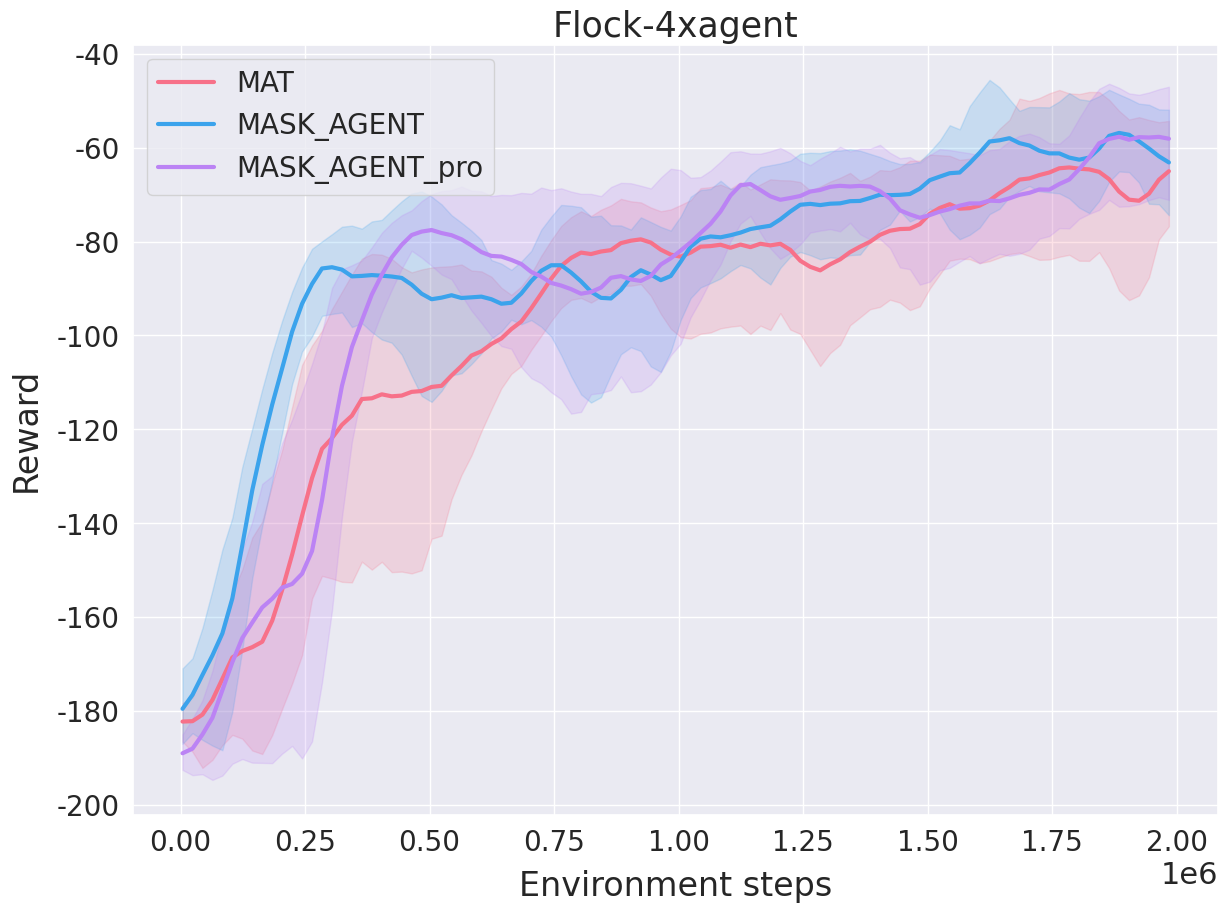

In [12]:
scenario = scenarios[0]
print(f"env: {env_name}")
if from_wandb:
    df, indicator = get_df_from_wandb(env, scenario, store, save_path, smooth, smooth_method, step_lenth)
else:
    df, indicator = get_df_from_local(env_name, scenario, save_path, smooth, smooth_method, step_lenth)
plot_one_scenario(df, indicator, env_name, scenario, save_plot, plot_path)


### plot Multi MAPs in one ENV to Multi IMAGEs

env: drone
env: drone
env: drone


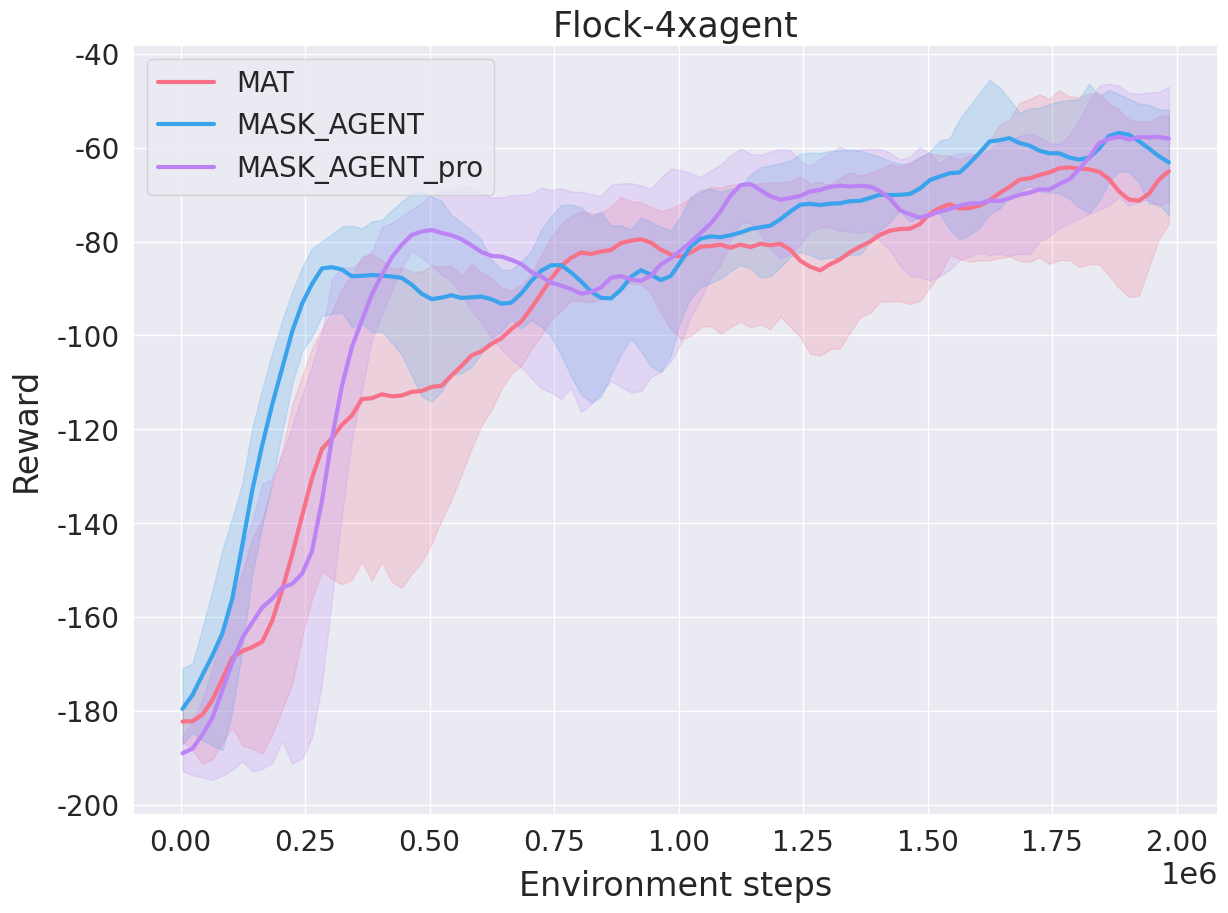

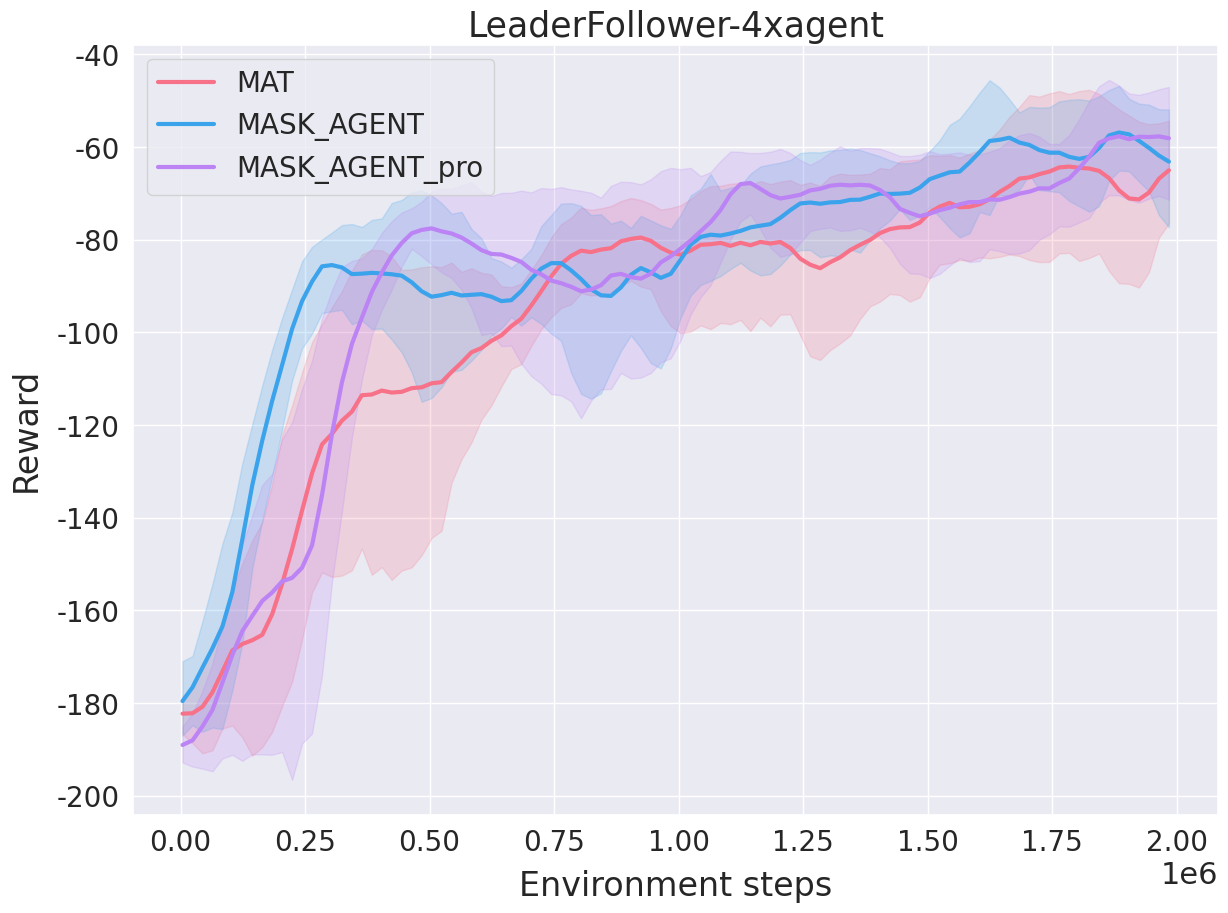

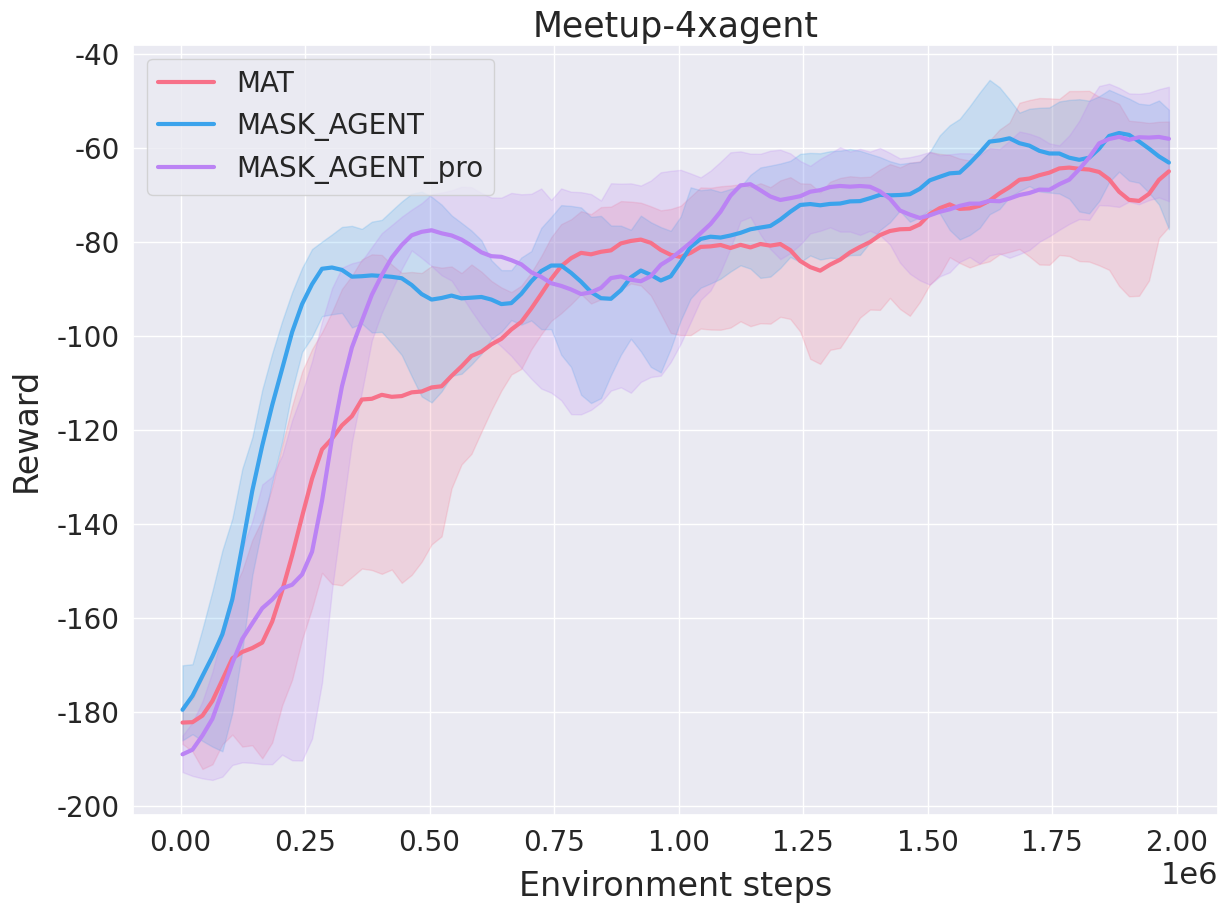

In [13]:
env_name = "drone"
env = env_list[env_name]
scenarios = [key for key in env.keys()]

for scenario in scenarios:
    print(f"env: {env_name}")
    if from_wandb:
        df, indicator = get_df_from_wandb(env, scenario, store, save_path ,smooth, smooth_method, step_lenth)
    else:
        df, indicator = get_df_from_local(env_name, scenario, save_path, smooth, smooth_method, step_lenth)
    plot_one_scenario(df, indicator, env_name, scenario, save_plot, plot_path)

### plot Multi MAPs in one ENV to one IMAGEs

env: drone


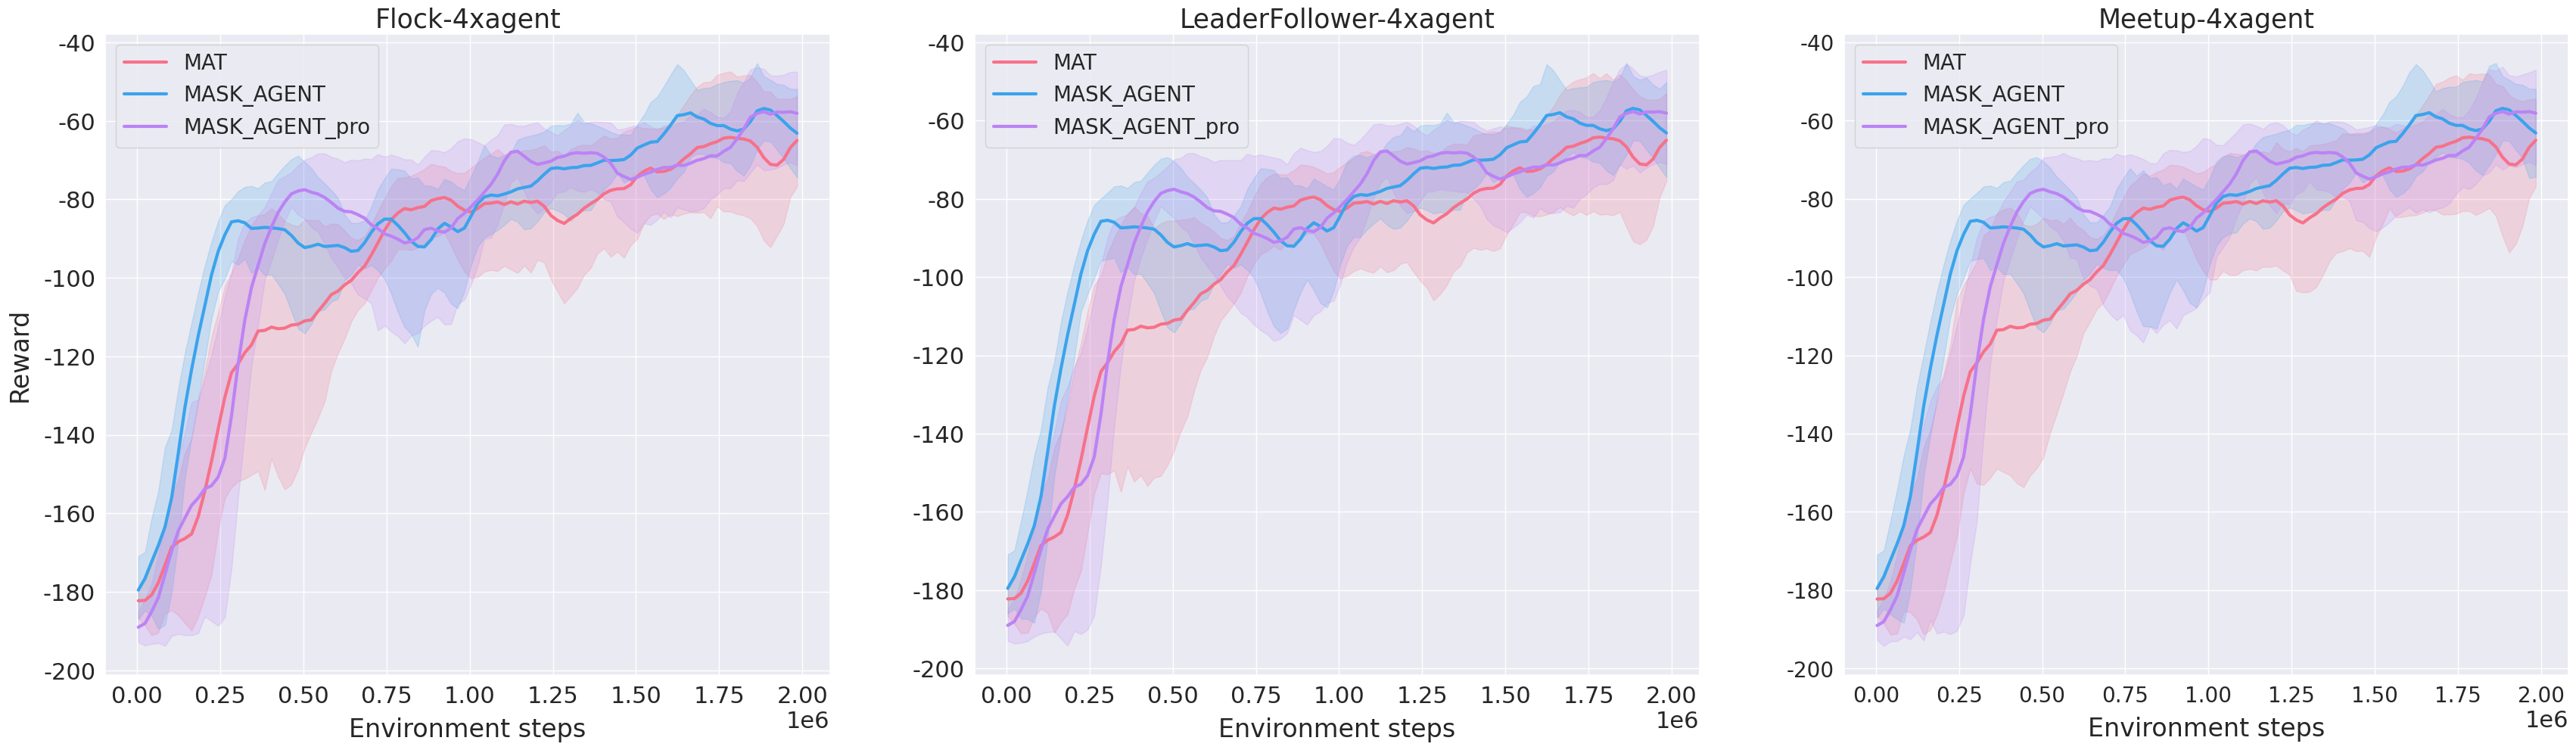

In [14]:
env_name = "drone"
env = env_list[env_name]
scenarios = [key for key in env.keys()]
dfargs = {
    "env_name": env_name,
    "env": env,
    "scenarios": scenarios,
    "store": store,
    "save_path": save_path,
    "step_lenth": step_lenth,
    "smooth": smooth,
    "smooth_method": smooth_method,
    "from_wandb": from_wandb,
}
print(f"env: {env_name}")
nsize = (1, 3)
plot_multi_scenario(env_name, scenarios, nsize, save_plot, plot_path, dfargs)
